In [2]:
! pip install matplotlib --upgrade
! pip install quandl


#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Cleaning up...


In [3]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "NEE", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

270


In [4]:
from yahoo_finance import Share

def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

In [5]:
print ("Started!!")

st = time.time()
start_date="2015-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 595.343004942


In [13]:
from sklearn.decomposition import PCA

N_stocks = len(input_list)
df_input = input_data[1:] / input_data[:-1]
D = int(0.1 * N_stocks)
pca = PCA(n_components=D)
pca.fit(df_input)

PCA(copy=True, n_components=27, whiten=False)

In [14]:
pca.components_.shape

(27, 270)

In [19]:
from sklearn.decomposition import PCA

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

class pcaDLR(object):
    
    def __init__(
            self, N_in, N_middle, N_out, 
            activation=np.tanh, r=1.0, scale=0.8,
            W_in=None, W_middle=None, W_out=None
        ):
        """shape feature
        Args:
            N_in (int): The dimention of input
            N_middle (int): the number of hidden nodes
            N_out (int): the dimention of output
            activation (lambda): activation function of middle layer
            r (float): the value of connections
            W_* (np.array): weitght for each layer
        """
        
        self.N_in = N_in
        self.N_out = N_out
        self.N_middle = N_middle
        self.activation = activation
        self.middle = np.zeros(shape=self.N_middle)
    
        if W_middle is None:
            W_middle = np.zeros(shape=(N_middle, N_middle))
            for i in xrange(N_middle - 1):
                W_middle[i + 1][i] = r
            """
            #normalization
            print (W_middle)
            eig_max = np.max(np.abs(np.linalg.eigvals(W_middle)))
            print (np.abs(np.linalg.eigvals(W_middle)))
            W_middle = W_middle / eig_max * scale
            """
        self.W_middle = W_middle
        
        if W_in is None:
            W_in = np.random.uniform(low=-1.0, high=1.0, size=(N_middle, N_in))
        self.W_in = W_in
        
    def normalization(self, data):
        dev = np.sqrt(np.var(data, axis=0))
        mean = np.mean(data, axis=0)
        return (data - mean) / dev, mean, dev
        
        
    def online_predict(self, input_data, target_data, start_time, N_memory=100, L2=1.0e-2 ):
        # use log ratio data
        df_input_tilde = np.log(input_data[1:] / input_data[:-1])
        pca = PCA(n_components=self.N_in)
        pca.fit(df_input_tilde)
        df_input_tilde = np.dot(pca.components_, df_input_tilde.T).T
        df_input, mean_ipt, dev_ipt = self.normalization(df_input_tilde)
        df_target_tilde = np.log(target_data[1:] / target_data[:-1])
        df_target, mean_tgt, dev_tgt = self.normalization(df_target_tilde)
        #keep deviance and mean for prediction
        self.input_mean = mean_ipt
        self.input_dev = dev_ipt
        self.output_mean = mean_tgt
        self.output_dev = dev_tgt
        
        N_data = len(df_input)
        Y = []
        X = []
        # initalization
        middle = np.zeros(shape=self.N_middle)
        output = np.zeros(shape=self.N_out)
        middle_data = []
        prediction = []
        for i in xrange(N_data - 1):
            middle = self.activation(
                np.dot(self.W_in, df_input[i])\
                + np.dot(self.W_middle, middle)
                )
            
            # start_time is time when starting learning
            if i >= start_time - 1:
                # minimize ||Y - X * W.T|| ** 2+ L2 * ||W|| ** 2
                Y.append(df_target[i])
                X.append(np.r_[df_input[i], middle])
                
            if i >= start_time + N_memory - 1:
                # print (i)
                X_tilde = np.array(X)
                Y_tilde = np.array(Y)
                if L2 == 0:
                    X_inv = np.real(np.linalg.pinv(X.T))
                else:
                    X_inv = np.dot(X_tilde, np.linalg.inv(L2 * np.identity(self.N_in + self.N_middle)\
                                                    + np.dot(X_tilde.T, X_tilde)))
                self.W_out = np.dot(Y_tilde.T, X_inv)
                # predict next one
                pre_out = np.r_[df_input[i + 1], middle]
                modified_out = self.output_dev * np.dot(self.W_out, pre_out) + self.output_mean
                prediction.append(np.exp(modified_out))
                # get rid of the past memeory to keep the fixed lenght memory
                del X[0]
                del Y[0]
        learned_data = target_data[start_time + N_memory:] * np.r_[1.0, np.array(prediction)]                
        
        return learned_data

learning_time: 10.8650529385


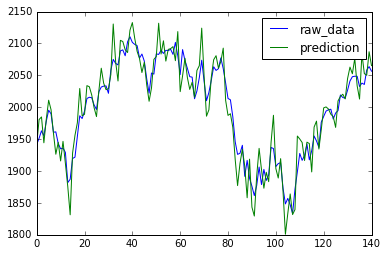

In [22]:
T = len(input_data)
N_middle = T
dim = int(0.1 * len(input_list))
esn = pcaDLR(N_in=dim, N_middle=N_middle, N_out=1, scale=0.8, r=0.5)
start_time = int(0.05 * T)
N_memory=100

st = time.time()
output_data = esn.online_predict(input_data=input_data, 
                           target_data=target_data, start_time=start_time,
                          N_memory=N_memory)
elapsed = time.time() - st
print ("learning_time:", elapsed)

plt.plot(target_data[start_time + N_memory:], label="raw_data")
plt.plot(output_data, label="prediction")
plt.legend()